In [3]:
import requests
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
df = pd.read_csv("pga_tour_stats_2020.csv")
df.head(10)

,PLAYER NAME,AVG_APPROACH_BIRDIE_OR_BETTER,AVG_APPROACH_BOGEY_OR_WORSE,AVG_APPROACH_PAR,AVG_APPROACH_SHOT_DISTANCE,FAIRWAY_APPROACH_RTP,GIR_PCT_FAIRWAY_BUNKER,GIR_PCT_FAIRWAY,GIR_PCT_OTHER,GIR_PCT_OVERALL,...,SCORING_PAR4_AVERAGE,SCORING_PAR5_AVERAGE,SCORING_ROUNDS_IN_60S,SCORING_AVG_OVERALL,SCORING_TOTAL_BIRDIES,SCORING_TOTAL_EAGLES,STREAKS_CUTS_MADE,STREAKS_FIRS_MADE,STREAKS_GIRS_MADE,STREAKS_HOLES_UNDER_PAR
0,Zac Blair,152.9,158.9,158.5,157.5,-0.034,39.5,74.74,51.59,63.47,...,4.07,4.65,25.0,71.705,240.0,1.0,NaN,0.0,0.0,3.0
1,Jimmy Walker,156.9,166.8,160.3,161.0,-0.033,57.8,78.74,50.88,62.20,...,4.11,4.74,10.0,71.927,159.0,4.0,NaN,3.0,0.0,3.0
2,Cameron Percy,161.3,164.0,161.6,161.9,-0.104,58.1,79.36,58.75,69.63,...,3.98,4.62,17.0,71.073,160.0,6.0,NaN,3.0,7.0,3.0
3,Sebastian Cappelen,161.7,161.1,153.6,156.4,-0.065,43.2,77.04,54.97,64.36,...,4.04,4.73,12.0,72.106,186.0,5.0,NaN,0.0,0.0,5.0
4,Brian Gay,162.3,159.8,156.1,158.0,-0.065,49.1,76.60,54.40,64.81,...,4.01,4.72,24.0,71.407,245.0,5.0,NaN,0.0,1.0,5.0
5,"Ted Potter, Jr.",162.7,166.2,156.2,159.2,-0.056,58.3,76.41,58.68,68.94,...,4.02,4.74,14.0,71.877,152.0,3.0,NaN,8.0,0.0,3.0
6,Arjun Atwal,162.9,163.0,156.3,158.7,-0.022,45.5,73.96,57.24,66.49,...,4.01,4.68,12.0,71.867,107.0,5.0,NaN,0.0,7.0,3.0
7,Vaughn Taylor,163.0,167.7,160.3,162.1,-0.076,41.9,71.35,51.65,63.75,...,4.02,4.72,26.0,70.827,237.0,3.0,NaN,4.0,1.0,5.0
8,Jason Dufner,164.2,161.4,162.8,162.9,-0.046,39.5,77.43,51.89,67.83,...,4.04,4.71,22.0,71.159,202.0,5.0,NaN,0.0,0.0,3.0
9,Roger Sloan,164.2,164.2,156.2,159.0,-0.068,56.3,75.48,53.69,65.58,...,4.03,4.64,17.0,71.586,174.0,7.0,2.0,0.0,0.0,4.0


In [5]:
##Show specific columns in relation to driving, putting, top 10 finishes and money earned
##Trimming data columns down to only show these 5 columns as I do not care about any of the other columns...
##...in relation to my hypothesis of 'do the top drivers or the top putters make the most money'
print(df[['PLAYER NAME','FINISHES_TOP10','FINISHES_OFFICIAL_MONEY','TEE_AVG_DRIVING_DISTANCE','PUTTING_AVG_OVERALL']])

            PLAYER NAME  FINISHES_TOP10 FINISHES_OFFICIAL_MONEY  \
0             Zac Blair             1.0               $745,273    
1          Jimmy Walker             NaN               $243,370    
2         Cameron Percy             1.0               $470,679    
3    Sebastian Cappelen             1.0               $371,482    
4             Brian Gay             2.0               $702,647    
..                  ...             ...                     ...   
352    Patrick Fishburn             NaN                     NaN   
353       Chip McDaniel             NaN                     NaN   
354        Roberto Díaz             NaN                     NaN   
355         Peter Kuest             NaN                     NaN   
356          Jay McLuen             NaN                     NaN   

     TEE_AVG_DRIVING_DISTANCE  PUTTING_AVG_OVERALL  
0                       280.9                1.589  
1                       298.0                1.627  
2                       295.0       

array([[<AxesSubplot:title={'center':'FINISHES_TOP10'}>,
        <AxesSubplot:title={'center':'TEE_AVG_DRIVING_DISTANCE'}>],
       [<AxesSubplot:title={'center':'PUTTING_AVG_OVERALL'}>,
        <AxesSubplot:>]], dtype=object)

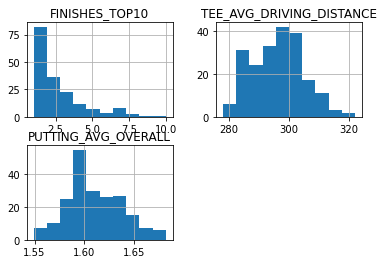

In [6]:
##Create potential visualizations 

df.hist(['FINISHES_TOP10','FINISHES_OFFICIAL_MONEY','TEE_AVG_DRIVING_DISTANCE','PUTTING_AVG_OVERALL'])

In [7]:
##show averages for 4 main topics withholding FINISHES_OFFICIAL_MONEY as we do not care about that yet
df['FINISHES_TOP10'].mean()

2.4237288135593222

In [8]:
##show averages
df['TEE_AVG_DRIVING_DISTANCE'].mean()

296.3687500000001

In [9]:
##show averages
df['PUTTING_AVG_OVERALL'].mean()

1.6105865384615377

In [10]:
##Distribution graphs to help assist in visualization of which columns are necessary and why certain columns were trimmed
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]##Display presentation between 1 & 50
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
plt.show()

<ipython-input-10-e5dd31274b34>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-10-e5dd31274b34>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-10-e5dd31274b34>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


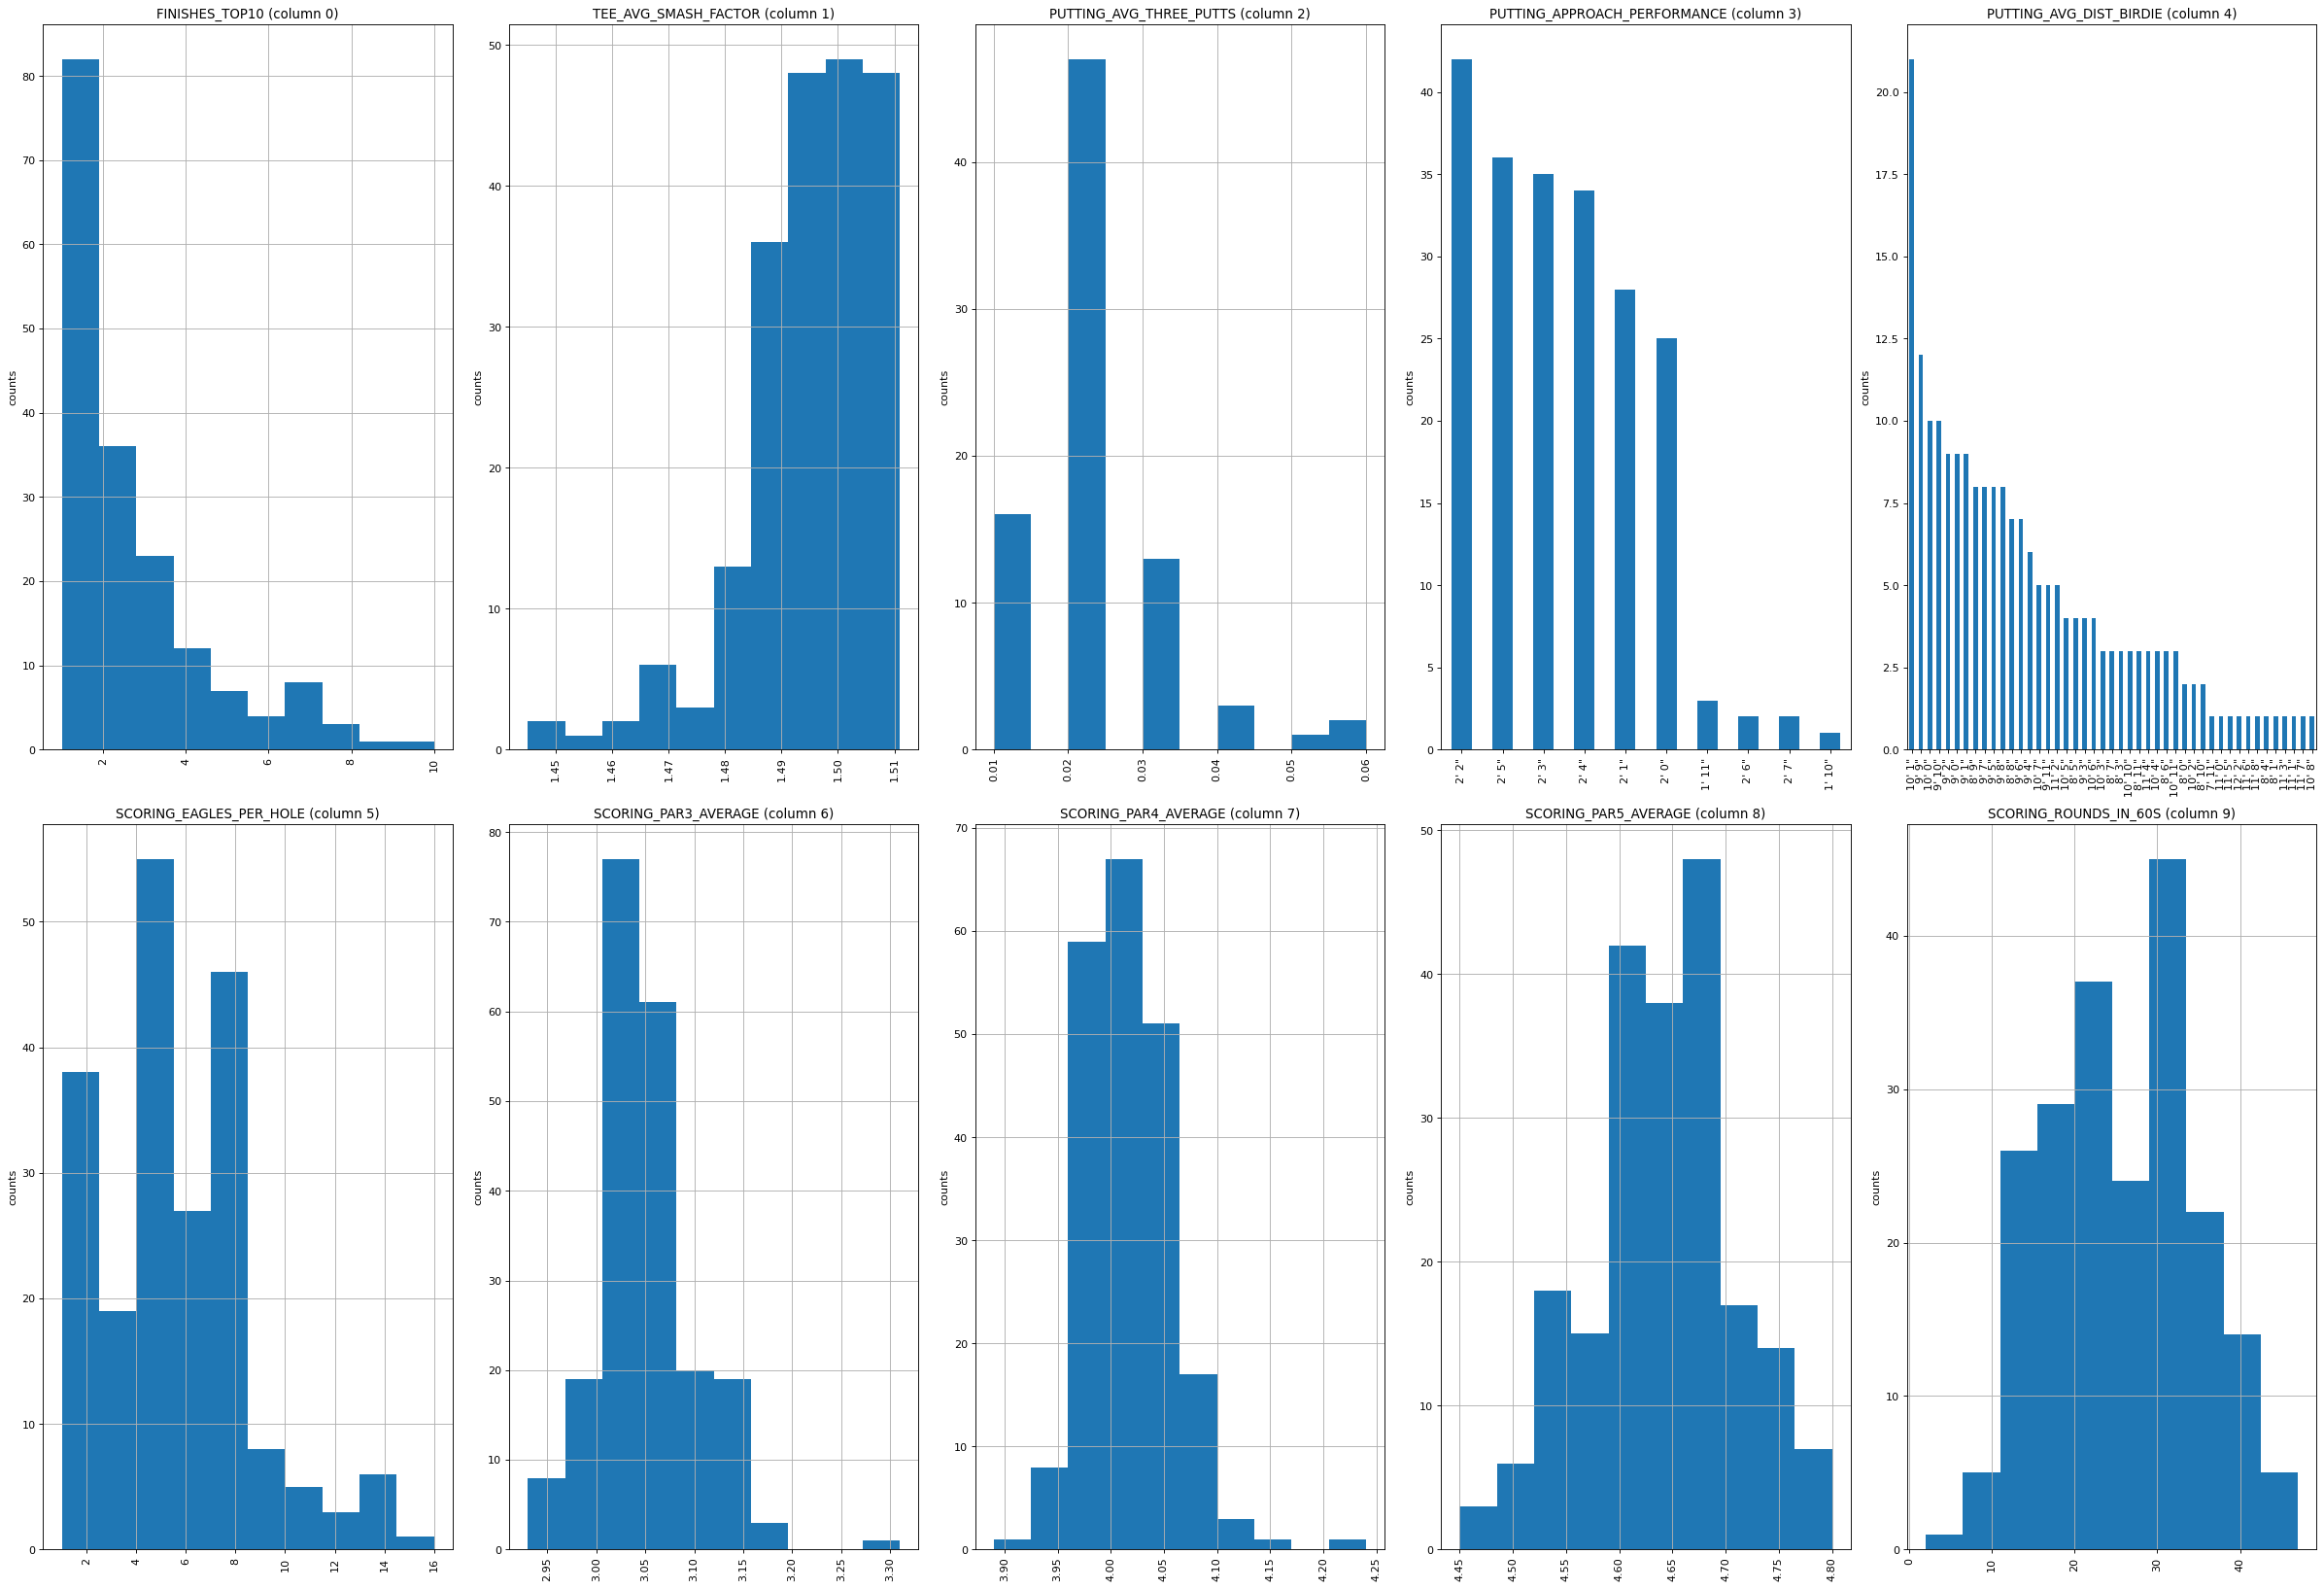

In [11]:
plotPerColumnDistribution(df, 10, 5)

In [12]:
##View variables
print("Describe Data")
print(df.describe())
print("Summarized Data")
print(df.describe(include=['O']))

Describe Data
       AVG_APPROACH_BIRDIE_OR_BETTER  AVG_APPROACH_BOGEY_OR_WORSE  \
count                     208.000000                   208.000000   
mean                      175.308173                   163.554327   
std                         6.215221                     5.282318   
min                       152.900000                   146.600000   
25%                       171.475000                   160.100000   
50%                       175.900000                   164.050000   
75%                       179.400000                   167.625000   
max                       189.500000                   176.400000   

       AVG_APPROACH_PAR  AVG_APPROACH_SHOT_DISTANCE  FAIRWAY_APPROACH_RTP  \
count        208.000000                  208.000000            208.000000   
mean         161.907212                  165.028846             -0.098341   
std            3.182591                    3.200956              0.035058   
min          148.700000                  154.800000     

In [13]:
##Import visulization packages
import matplotlib.pyplot as plt

In [14]:
##Set up figsize
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

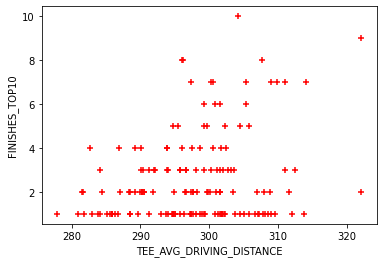

In [29]:
##setting up linear regression for driving distance analysis
import numpy as np
from sklearn import linear_model
%matplotlib inline
##Linear regression formual is y = mx+b
##Avg drive 296.3687500000001

##set up data for viewing
plt.xlabel('TEE_AVG_DRIVING_DISTANCE')
plt.ylabel('FINISHES_TOP10')
plt.scatter(df.TEE_AVG_DRIVING_DISTANCE, df.FINISHES_TOP10, color='red', marker='+')

In [35]:
##training linear model 
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)
reg = linear_model.LinearRegression()
reg.fit(df[['FINISHES_TOP10']],df.TEE_AVG_DRIVING_DISTANCE)

LinearRegression()

In [40]:
##Value of M or top 10 finishes 
reg.coef_

array([0.48807056])

In [41]:
##Value of B or average top 10 driving distance
reg.intercept_

343.1973940424172

In [ ]:
## the top 10 drivers avg a distance of 343.19 yards off the tee

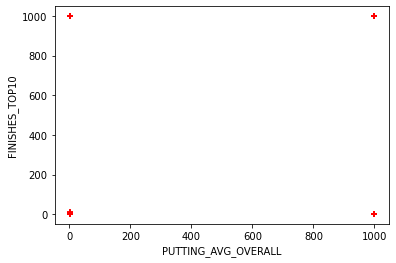

In [42]:
##setting up linear regression for driving distance analysis
import numpy as np
from sklearn import linear_model
%matplotlib inline
##Linear regression formual is y = mx+b
##Avg drive 296.3687500000001

##set up data for viewing
plt.xlabel('PUTTING_AVG_OVERALL')
plt.ylabel('FINISHES_TOP10')
plt.scatter(df.PUTTING_AVG_OVERALL, df.FINISHES_TOP10, color='red', marker='+')

In [43]:
##training linear model 
##data set not really equipped for linear regression for putting avg will need to find better model to use 
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)
reg = linear_model.LinearRegression()
reg.fit(df[['FINISHES_TOP10']],df.PUTTING_AVG_OVERALL)

LinearRegression()

In [44]:
##Value of M or top 10 finishes 
reg.coef_

array([0.69372458])

In [45]:
##Value of B or PUTTING_AVG_OVERALL
reg.intercept_

67.62700344940788

In [ ]:
##the top 10 drivers avg 67 putts per tournament